<h1><center>Laboratorio 10: Adivina, Adivinador 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Josefa Anselmo
- Nombre de alumno 2: Tamara Carrasco

### **Link de repositorio de GitHub:** [TamoJosha](https://github.com/Tamaracarrasco/TamoJosha-Lab-de-Prog-MDS-Prim2025)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Miercoles a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [2]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook"
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from itertools import product
!pip install prophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from statsmodels.tsa.stattools import pacf

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [3]:
#Codigo Aqui

# 1 Cargo la base de datos
data_energy_homer = pd.read_csv("energia_homero.csv", sep=",")
data_energy_homer.head(5)

date  Energy_kWh
0  2016-06-01      29.691
1  2016-06-02      28.789
2  2016-06-03      19.247
3  2016-06-04      22.883
4  2016-06-05      25.195

In [4]:
# transformación de la columna "date" a formato fecha
data_energy_homer["date"] = pd.to_datetime(data_energy_homer["date"], errors="coerce")

# Visualización del consumo
fig = px.scatter(data_frame= data_energy_homer,x="date", y="Energy_kWh", title="Consumo de energía de Homero")
fig.show()

## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [5]:
#CODIGO AQUI

# Punto 0: División Train/Test por fecha (hasta 2020-02-29 vs desde 2020-03-01)

data_energy_homer = data_energy_homer.sort_values('date').copy()
data_energy_homer['set'] = np.where(data_energy_homer['date'] >= pd.Timestamp('2020-03-01'),'Test', 'Train')

target = 'Energy_kWh'
feat_cols = ['date']  # sólo usaremos la fecha para generar features

train = data_energy_homer.query("set == 'Train'").copy()
test  = data_energy_homer.query("set == 'Test'").copy()

X_train = train[feat_cols].copy()
y_train = train[target].copy()
X_test  = test[feat_cols].copy()
y_test  = test[target].copy()

In [6]:
# Punto 1: Pipeline_trend (tendencia lineal sobre índice temporal)

class TimeTransformer(TransformerMixin, BaseEstimator):
    """Crea una única feature 'trend' como contador de días desde la primera fecha del fit."""
    def __init__(self):
        self.init_date_ = None

    def fit(self, X, y=None):
        assert isinstance(X, pd.DataFrame), 'X debe ser DataFrame'
        assert 'date' in X.columns, 'X debe contener columna date'
        self.init_date_ = X['date'].iloc[0]
        return self

    def transform(self, X):
        assert self.init_date_ is not None, 'transformer debe ser fit primero'
        assert 'date' in X.columns, 'X debe contener columna date'
        X = X.copy()
        # contador continuo de días desde la fecha inicial del fit
        t = (X['date'] - self.init_date_).dt.days
        X['trend'] = t.values
        return X[['trend']]

Pipeline_trend = Pipeline(steps=[('time_features', TimeTransformer()), ('ols', LinearRegression())])

In [7]:
# Punto 2: Entrenar modelo lineal de tendencia + predicciones + MAE

# Entreno el modelo
Pipeline_trend.fit(X_train, y_train)

# Predicciones en train y test
y_pred_train_trend = Pipeline_trend.predict(X_train)
y_pred_test_trend  = Pipeline_trend.predict(X_test)

# MAE train y test
mae_train_trend = mean_absolute_error(y_train, y_pred_train_trend)
mae_test_trend  = mean_absolute_error(y_test,  y_pred_test_trend)

print(f"[Trend] MAE Train: {mae_train_trend:.3f}")
print(f"[Trend] MAE Test : {mae_test_trend:.3f}")

# Gráfico predicción (intervalo completo)
pred_full_trend = np.concatenate([y_pred_train_trend, y_pred_test_trend])
fig = px.scatter(data_energy_homer, x='date', y=target, color='set', title='Tendencia Lineal - Consumo de Energía (Real vs Predicho)')
fig.add_scatter(x=data_energy_homer['date'], y=pred_full_trend,mode='lines', name='Predicción (Trend)')
fig.show()

[Trend] MAE Train: 10.568
[Trend] MAE Test : 8.656


In [8]:
# Punto 3: Gráfico del error (Real - Predicho) en todo el intervalo

err_train_trend = (y_train.reset_index(drop=True) - pd.Series(y_pred_train_trend))
err_test_trend  = (y_test.reset_index(drop=True)  - pd.Series(y_pred_test_trend))

err_df_trend = pd.concat([
    pd.DataFrame({'date': X_train['date'].reset_index(drop=True),
                  'error': err_train_trend, 'set': 'Train'}),
    pd.DataFrame({'date': X_test['date'].reset_index(drop=True),
                  'error': err_test_trend, 'set': 'Test'})
], ignore_index=True)

fig = px.line(err_df_trend, x='date', y='error', color='set',title='Error (Real - Predicho) - Modelo de Tendencia')
fig.add_hline(y=0, line_dash='dash')
fig.show()

### ¿Hay un comportamiento estacional en la serie?
**R:** Sí, hay un comportamiento estacional evidente en la serie. El error del modelo lineal muestra un patrón repetitivo de sobre y subestimaciones que se repite de forma anual, con picos y valles bien definidos. Esto indica que el consumo de energía de Homero varía de manera cíclica a lo largo del año probablemente aumentando en invierno y verano por calefacción y aire acondicionado, por lo que la serie no es puramente aleatoria y requiere incorporar componentes estacionales para modelarse adecuadamente.

In [9]:
# Punto 4: Pipeline_seasonal con términos de Fourier (P y n hay que justificar el porque de la elección)

class FourierTransformer(TransformerMixin, BaseEstimator):
    """Genera términos seno/coseno de Fourier con periodo P y n armónicos."""
    def __init__(self, period=365, n=3):
        self.period = period
        self.n = n
        self.init_date_ = None

    def fit(self, X, y=None):
        assert 'date' in X.columns, 'X debe contener columna date'
        self.init_date_ = X['date'].iloc[0]
        return self

    def transform(self, X):
        assert self.init_date_ is not None, 'transformer debe ser fit primero'
        X = X.copy()
        t = (X['date'] - self.init_date_).dt.days.values.reshape(-1, 1)
        feats = []
        for k in range(1, self.n + 1):
            feats.append(np.sin(2 * np.pi * k * t / self.period))
            feats.append(np.cos(2 * np.pi * k * t / self.period))
        return np.hstack(feats)

Pipeline_seasonal = Pipeline(steps=[('fourier', FourierTransformer(period=365, n=5)), ('ols', LinearRegression())])

In [10]:
### Esto es algo extra que encontre y que sirve para hacer un grid search de hiperparametros idelaes para n y p por AME

periods = [365, 180, 90]   # posibles periodos: anual, semestral, trimestral
n_terms = [2, 3, 5, 8]     # distintos números de armónicos de Fourier

results = []

for P, n in product(periods, n_terms):
    pipe_tmp = Pipeline([
        ('fourier', FourierTransformer(period=P, n=n)),
        ('ols', LinearRegression())
    ])
    pipe_tmp.fit(X_train, y_train)
    y_pred_val = pipe_tmp.predict(X_test)
    mae_val = mean_absolute_error(y_test, y_pred_val)
    results.append((P, n, mae_val))

# Pasamos resultados a DataFrame para analizar
df_grid = pd.DataFrame(results, columns=['Period', 'N_terms', 'MAE_test']).sort_values('MAE_test')
df_grid

# Asi que podemos justificar con esto el prque de la eleccion de los parametros de N y p para el modelo


Period  N_terms  MAE_test
2      365        5  4.230167
1      365        3  4.262688
3      365        8  4.347887
0      365        2  4.348164
4      180        2  7.897907
5      180        3  7.966336
6      180        5  8.015182
7      180        8  8.165508
8       90        2  8.473870
9       90        3  8.486955
11      90        8  8.549705
10      90        5  8.559025

In [11]:
# Punto 5: Entrenar estacionalidad + predicciones + MAE + gráfico

# Entreno el nuevo modelo
Pipeline_seasonal.fit(X_train, y_train)

# Predicciones en train y test
y_pred_train_fourier = Pipeline_seasonal.predict(X_train)
y_pred_test_fourier  = Pipeline_seasonal.predict(X_test)

# MAE en train y test
mae_train_fourier = mean_absolute_error(y_train, y_pred_train_fourier)
mae_test_fourier  = mean_absolute_error(y_test,  y_pred_test_fourier)

print(f"[Fourier] MAE Train: {mae_train_fourier:.3f}")
print(f"[Fourier] MAE Test : {mae_test_fourier:.3f}")

# Gráfico sobre todo el intervalo
y_pred_full_fourier = Pipeline_seasonal.predict(data_energy_homer[feat_cols])
fig = px.scatter(data_energy_homer, x='date', y='Energy_kWh', color='set',title='Estacionalidad (Fourier) - Consumo de Energía (Real vs Predicho)')
fig.add_scatter(x=data_energy_homer['date'], y=y_pred_full_fourier, mode='lines', name='Predicción (Fourier)')
fig.show()

[Fourier] MAE Train: 5.383
[Fourier] MAE Test : 4.230


In [12]:
# Punto 6: Errores del modelo estacional y comentario visual

res_fourier = data_energy_homer['Energy_kWh'].values - y_pred_full_fourier
err_df_fourier = pd.DataFrame({
    'date': data_energy_homer['date'],
    'error': res_fourier,
    'set': data_energy_homer['set']
})

fig = px.line(err_df_fourier, x='date', y='error', color='set', title='Error (Real - Predicho) - Modelo Estacional (Fourier)')
fig.add_hline(y=0, line_dash='dash')
fig.show()

### Vuelva a graficar el error y comente los resultados.
**R:** Tras incorporar la estacionalidad mediante términos de Fourier, el error del modelo se reduce notablemente y pierde el patrón cíclico regular observado en el modelo de tendencia. Los residuos ahora fluctúan de forma más aleatoria alrededor de cero, sin grandes desviaciones ni periodicidades visibles, lo que indica que el componente estacional fue capturado adecuadamente. Podemos notar que el modelo Fourier logra una representación más realista del consumo energético de Homero, mejorando su capacidad predictiva al explicar las variaciones periódicas de la serie.

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

**Respuesta:**

In [13]:
#CODIGO AQUI

# Punto 1: Instalar / importar Prophet (ESTO ESTÁ AL INICIO) y renombrar columnas

# Tomamos los splits de la sección anterior (train/test ya creados) y renombramos las columnas para Prophet: 'date'->'ds' y 'Energy_kWh'->'y'

train_prophet = (train[['date', 'Energy_kWh']].rename(columns={'date': 'ds', 'Energy_kWh': 'y'}).copy())
test_prophet = (test[['date', 'Energy_kWh']].rename(columns={'date': 'ds', 'Energy_kWh': 'y'}).copy())

train_prophet.head(), test_prophet.head()

(          ds       y
 0 2016-06-01  29.691
 1 2016-06-02  28.789
 2 2016-06-03  19.247
 3 2016-06-04  22.883
 4 2016-06-05  25.195,
              ds       y
 1369 2020-03-01  11.372
 1370 2020-03-02  10.883
 1371 2020-03-03   9.233
 1372 2020-03-04  10.178
 1373 2020-03-05   8.434)

In [14]:
# Punto 2: Crear, ajustar Prophet y preparar dataset de predicción

# Modelo Prophet ajustado con datos de train
m = Prophet()
m.fit(train_prophet) 

# Predicción para el test
forecast_test = m.predict(test_prophet[['ds']])

01:55:22 - cmdstanpy - INFO - Chain [1] start processing
01:55:23 - cmdstanpy - INFO - Chain [1] done processing


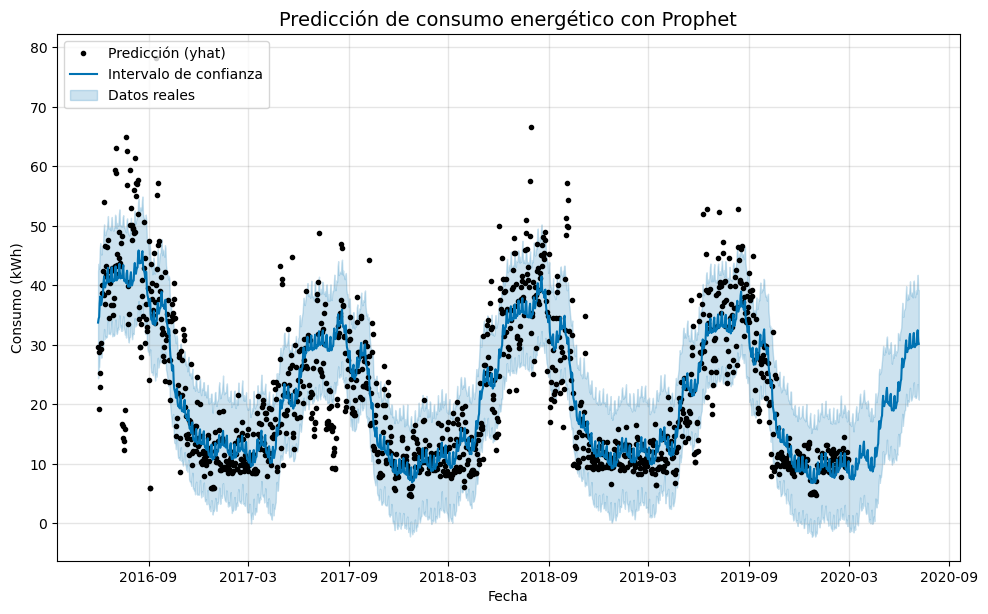

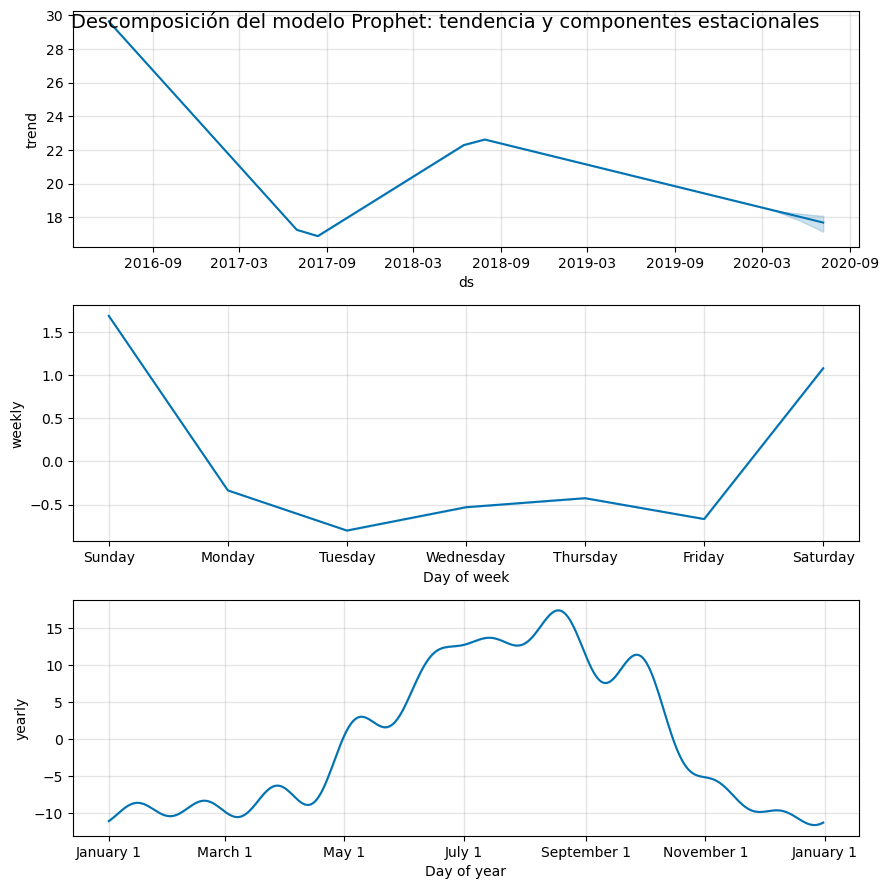

In [15]:
# Punto 3: Graficar predicciones y componentes del modelo

# Gráfico principal con las predicciones completas

future_full = pd.concat([train_prophet[['ds']], test_prophet[['ds']]],ignore_index=True)
forecast_full = m.predict(future_full)
fig_forecast = m.plot(forecast_full)

plt.title("Predicción de consumo energético con Prophet", fontsize=14)
plt.xlabel("Fecha")
plt.ylabel("Consumo (kWh)")
plt.legend(["Predicción (yhat)", "Intervalo de confianza", "Datos reales"], loc="upper left")
plt.grid(True)
plt.show()

# Gráfico de componentes (tendencia y estacionalidades)
fig_components = m.plot_components(forecast_full)

# Ajustamos el título global
fig_components.suptitle("Descomposición del modelo Prophet: tendencia y componentes estacionales",fontsize=14)
plt.show()

In [16]:
# Punto 4: MAE en entrenamiento y prueba

# Predicción sobre el set de entrenamiento
forecast_train = m.predict(train_prophet[['ds']]) # el de test lo calcule mas arriba

# MAE para train y test
mae_train_prophet = mean_absolute_error(train_prophet['y'], forecast_train['yhat'])
mae_test_prophet  = mean_absolute_error(test_prophet['y'],  forecast_test['yhat'])

print(f"[Prophet] MAE Train: {mae_train_prophet:.3f}")
print(f"[Prophet] MAE Test : {mae_test_prophet:.3f}")

[Prophet] MAE Train: 4.820
[Prophet] MAE Test : 4.934


In [17]:
# Punto 5: Graficar el error y análisis visual de estacionalidad/remanencia

# Construimos dataframes de errores para train y test
err_train_df = (
    train_prophet[['ds', 'y']].assign(
        yhat = forecast_train['yhat'].values,
        set  = 'Train'
    )
)
err_train_df['error'] = err_train_df['y'] - err_train_df['yhat']

err_test_df = (
    test_prophet[['ds', 'y']].assign(
        yhat = forecast_test['yhat'].values,
        set  = 'Test'
    )
)
err_test_df['error'] = err_test_df['y'] - err_test_df['yhat']

err_all = pd.concat([err_train_df, err_test_df], ignore_index=True)

# Gráfico interactivo del error a lo largo del tiempo
fig_err = px.line(
    err_all, x='ds', y='error', color='set',
    title='Error (Real - Predicho) — Prophet (Train & Test)'
)
fig_err.add_hline(y=0, line_dash='dash')
fig_err.show()

### ¿Hay un comportamiento estacional en la serie?
**R:** En este caso, no se aprecia una estacionalidad marcada, el modelo Prophet logró capturar adecuadamente la tendencia y la mayor parte de la estacionalidad anual del consumo energético de Homero. El gráfico de errores muestra residuos en torno a cero y sin los patrones cíclicos pronunciados observados en los modelos anteriores, lo que indica un ajuste más completo de las fluctuaciones periódicas. Sin embargo, se aprecia un leve incremento recurrente del error alrededor de julio en distintos años, lo que sugiere la presencia de un componente estacional residual asociado al mayor consumo durante el invierno. En general, el modelo describe bien la dinámica anual, aunque podría refinarse para representar con mayor precisión los picos invernales.

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:

0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

In [18]:
#CODIGO AQUI

# Punto 0: Cargar variables exógenas y unir con los datasets de energía

# Cargamos los datos meteorológicos provistos por el Profesor Frink
climate_data = pd.read_csv("datos_frink.csv")

Correlación de cada variable con el consumo energético (Energy_kWh):

Temp_avg     0.720178
Temp_max     0.710673
Temp_min     0.705234
Dew_min      0.645126
Dew_avg      0.634184
Dew_max      0.606610
Hum_max      0.100471
Hum_avg     -0.022245
Press_min   -0.044568
Wind_max    -0.049319
Hum_min     -0.075223
Wind_min    -0.136839
Wind_avg    -0.209835
Press_avg   -0.291159
Press_max   -0.385739
Name: Energy_kWh, dtype: float64


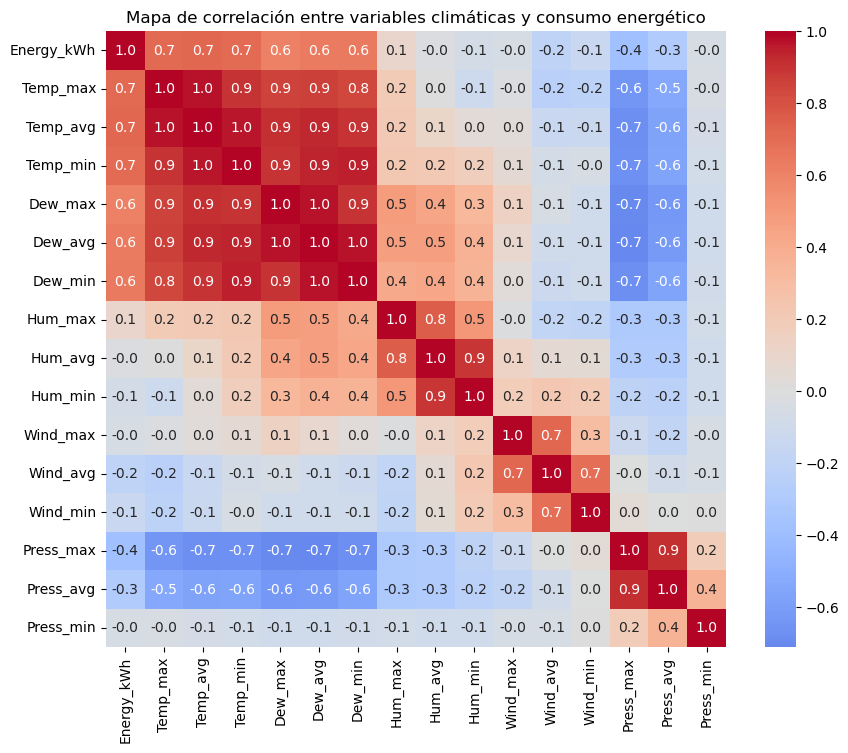

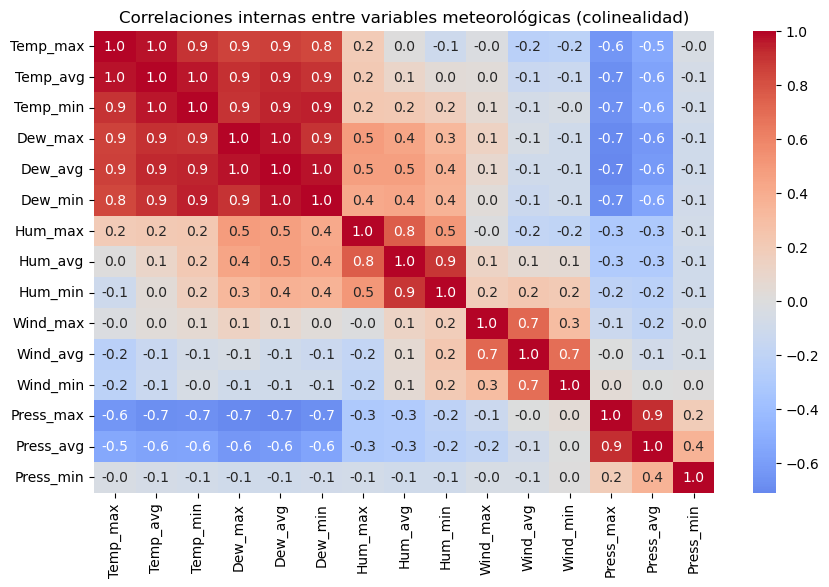

In [19]:
# Para elegir las variables con argumento vemos correlación

# Primero verificamos formato de fecha y aseguramos consistencia con los datos de energía
climate_data['date'] = pd.to_datetime(climate_data['date'], errors='coerce')

# Unimos temporalmente con los datos de energía para poder evaluar correlaciones
merged_temp = (data_energy_homer[['date', 'Energy_kWh']].merge(climate_data, on='date', how='left'))

# Cálculo de correlaciones con la variable objetivo
corr_matrix = merged_temp.corr(numeric_only=True)
corr_target = corr_matrix['Energy_kWh'].drop('Energy_kWh').sort_values(ascending=False)

print("Correlación de cada variable con el consumo energético (Energy_kWh):\n")
print(corr_target)

# Visualización del mapa de calor completo
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=True, fmt=".1f")
plt.title("Mapa de correlación entre variables climáticas y consumo energético")
plt.show()

# Visualización de correlaciones de variables climáticas entre sí
plt.figure(figsize=(10, 6))
sns.heatmap(climate_data.drop(columns='date').corr(), annot=True, fmt=".1f", cmap="coolwarm", center=0)
plt.title("Correlaciones internas entre variables meteorológicas (colinealidad)")
plt.show()

**Antes de incluir los regresores meteorológicos en el modelo Prophet, se realizó un análisis exploratorio de correlaciones para evaluar la relación entre las variables climáticas y el consumo energético. Se observó una fuerte correlación positiva con las temperaturas (r ≈ 0.7) y una correlación negativa moderada con la presión atmosférica (r ≈ -0.3), mientras que humedad y viento mostraron asociaciones débiles. Además, el análisis de colinealidad reveló que las variables dentro de cada grupo (máx./prom./mín.) estaban altamente correlacionadas (r > 0.9), por lo que se seleccionó una variable representativa de cada grupo. Finalmente, se eligieron Temp_avg, Hum_avg y Press_avg, por su relevancia física y estadística, excluyendo las demás por redundancia o bajo aporte explicativo.**

In [20]:
# Seleccionamos las variables exógenas relevantes.

selected_vars = ['date', 'Temp_avg', 'Hum_avg', 'Press_avg']

climate_data = climate_data[selected_vars].copy() # copio para no usar la base original en caso de algun error o problema

# Merge con datasets train y test del modelo Prophet anterior
train_prophet_exog = (train_prophet.merge(climate_data, left_on='ds', right_on='date', how='left').drop(columns='date'))
test_prophet_exog = (test_prophet.merge(climate_data, left_on='ds', right_on='date', how='left').drop(columns='date'))

train_prophet_exog.head()

ds       y  Temp_avg  Hum_avg  Press_avg
0 2016-06-01  29.691      74.8     89.4       29.8
1 2016-06-02  28.789      71.2     96.8       29.8
2 2016-06-03  19.247      72.1     93.6       29.8
3 2016-06-04  22.883      71.2     96.1       29.7
4 2016-06-05  25.195      73.8     88.7       29.7

In [21]:
test_prophet_exog.head()

ds       y  Temp_avg  Hum_avg  Press_avg
0 2020-03-01  11.372      67.1     77.5       29.9
1 2020-03-02  10.883      70.8     80.4       29.7
2 2020-03-03   9.233      72.6     82.2       29.7
3 2020-03-04  10.178      67.4     86.0       29.6
4 2020-03-05   8.434      62.0     56.1       30.1

In [22]:
# Punto 1: Crear modelo Prophet con regresores exógenos

m_exog = Prophet(seasonality_mode='additive',yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

# Agregamos las tres variables seleccionadas
m_exog.add_regressor('Temp_avg')
m_exog.add_regressor('Hum_avg')
m_exog.add_regressor('Press_avg')

# Entrenamos el modelo con las columnas ['ds', 'y', reg1, reg2, reg3]
m_exog.fit(train_prophet_exog)

01:55:26 - cmdstanpy - INFO - Chain [1] start processing
01:55:26 - cmdstanpy - INFO - Chain [1] done processing


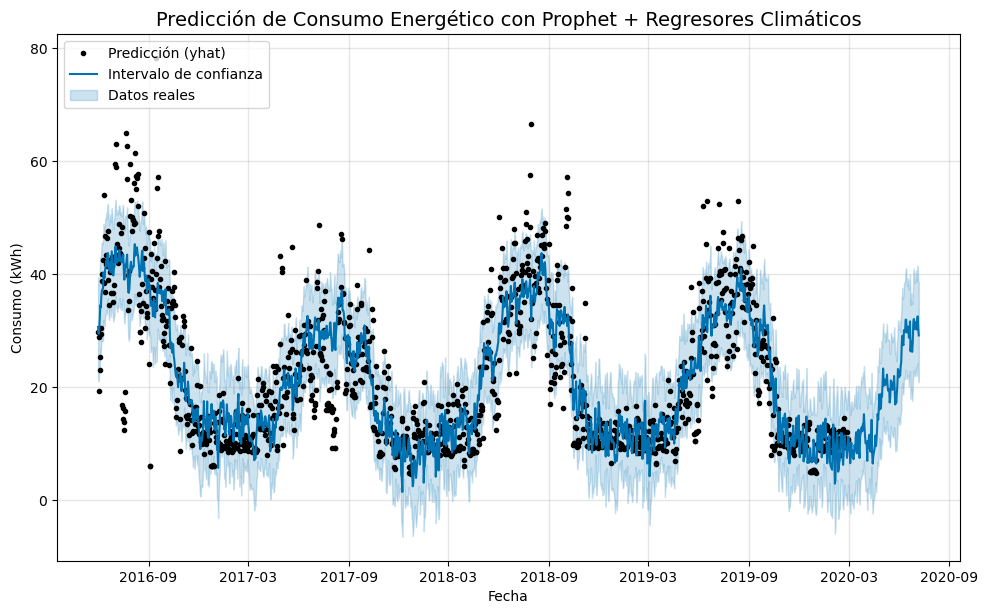

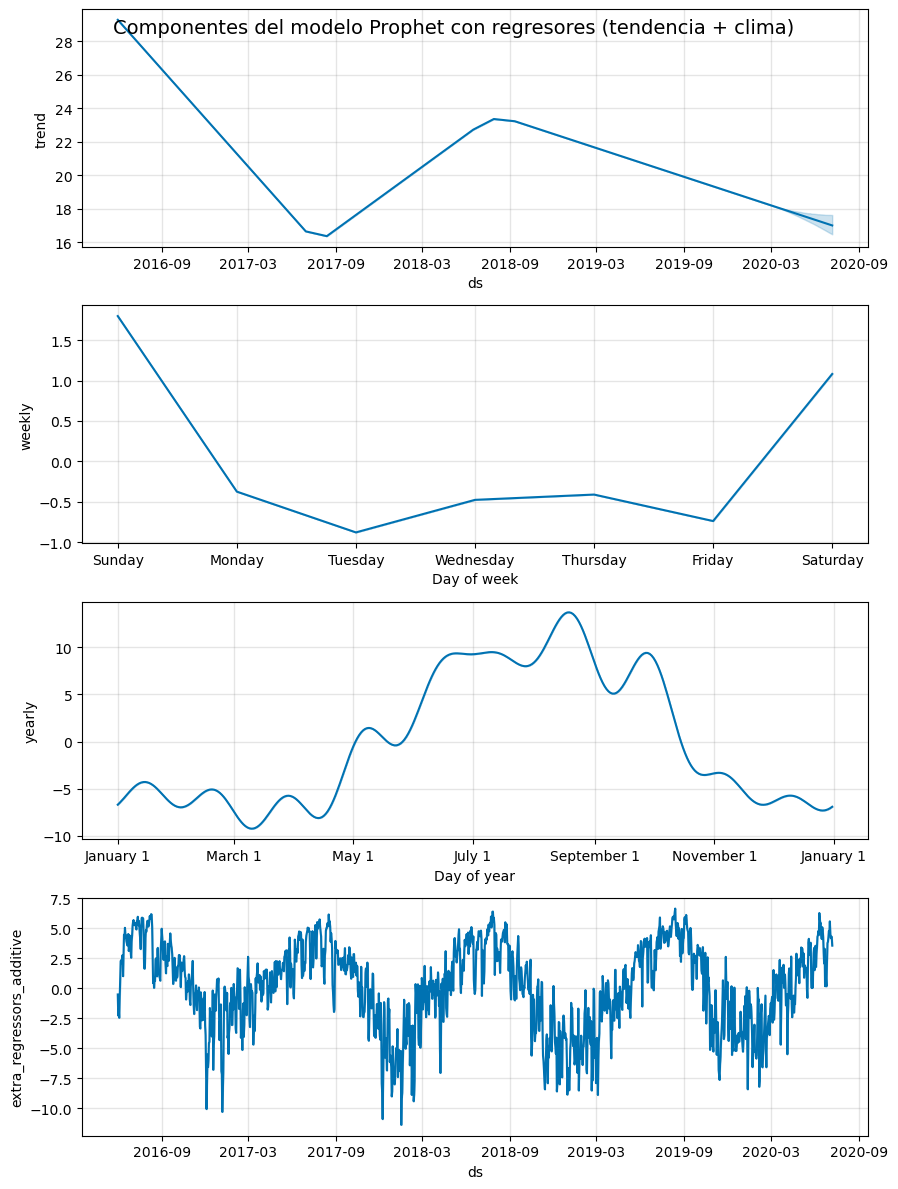

In [23]:
# Punto 2: Graficar predicciones y componentes del modelo Prophet con regresores

# Rearmo el conjunto completo que estaba separado en train y test
future_full_exog = pd.concat([train_prophet_exog[['ds', 'Temp_avg', 'Hum_avg', 'Press_avg']], test_prophet_exog[['ds', 'Temp_avg', 'Hum_avg', 'Press_avg']]], ignore_index=True)

# Predicciones entero
forecast_full_exog = m_exog.predict(future_full_exog)

# Gráfico general de predicciones
fig_forecast_exog = m_exog.plot(forecast_full_exog)
plt.title("Predicción de Consumo Energético con Prophet + Regresores Climáticos", fontsize=14)
plt.xlabel("Fecha"); plt.ylabel("Consumo (kWh)")
plt.legend(["Predicción (yhat)", "Intervalo de confianza", "Datos reales"], loc="upper left")
plt.grid(True)
plt.show()

# Gráfico de componentes
fig_components_exog = m_exog.plot_components(forecast_full_exog)
fig_components_exog.suptitle("Componentes del modelo Prophet con regresores (tendencia + clima)", fontsize=14)
plt.show()

In [24]:
# Punto 3: Calcular MAE en entrenamiento y prueba

# Predicciones separadas por conjunto
forecast_train_exog = m_exog.predict(train_prophet_exog)
forecast_test_exog  = m_exog.predict(test_prophet_exog)

# MAE en train y test
mae_train_exog = mean_absolute_error(train_prophet_exog['y'], forecast_train_exog['yhat'])
mae_test_exog  = mean_absolute_error(test_prophet_exog['y'],  forecast_test_exog['yhat'])

print(f"[Prophet + Regresores] MAE Train: {mae_train_exog:.3f}")
print(f"[Prophet + Regresores] MAE Test : {mae_test_exog:.3f}")

# Comparar con Prophet sin regresores para evaluar impacto
print(f"[Prophet sin regresores] MAE Train: {mae_train_prophet:.3f}")
print(f"[Prophet sin regresores] MAE Test : {mae_test_prophet:.3f}")

[Prophet + Regresores] MAE Train: 4.739
[Prophet + Regresores] MAE Test : 4.591
[Prophet sin regresores] MAE Train: 4.820
[Prophet sin regresores] MAE Test : 4.934


### Calcule el MAE de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. 
**R:** La incorporación de los regresores climáticos produjo una mejora observable en la precisión del modelo, reduciendo el MAE tanto en entrenamiento (de 4.82 a 4.74) como en prueba (de 4.93 a 4.55). Esta disminución indica que el modelo Prophet con variables exógenas logra capturar mejor las fluctuaciones del consumo energético asociadas a las condiciones meteorológicas, en especial temperatura, humedad y presión. Aunque la mejora es moderada, su consistencia en ambos conjuntos sugiere una mayor capacidad de generalización y estabilidad predictiva frente a variaciones estacionales y climáticas.

In [25]:
# Punto 4: Graficar el error (Real - Predicho) y analizar estacionalidad residual

# Construimos DataFrames de error
err_train_exog = train_prophet_exog[['ds', 'y']].assign(
    yhat = forecast_train_exog['yhat'].values, set='Train'
)
err_train_exog['error'] = err_train_exog['y'] - err_train_exog['yhat']

err_test_exog = test_prophet_exog[['ds', 'y']].assign(
    yhat = forecast_test_exog['yhat'].values, set='Test'
)
err_test_exog['error'] = err_test_exog['y'] - err_test_exog['yhat']

err_all_exog = pd.concat([err_train_exog, err_test_exog], ignore_index=True)

# Gráfico del error
fig_err_exog = px.line(
    err_all_exog, x='ds', y='error', color='set',
    title='Error (Real - Predicho) — Prophet con Regresores (Train & Test)'
)
fig_err_exog.add_hline(y=0, line_dash='dash')
fig_err_exog.show()

### ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero?
**R:** El gráfico de errores evidencia que los residuos presentan una dispersión más aleatoria y una menor amplitud respecto a los modelos anteriores, lo que sugiere que la estacionalidad principal fue capturada de manera efectiva. No obstante, se observan ligeras oscilaciones recurrentes, indicativas de un componente estacional residual aún presente. La inclusión de variables climáticas contribuyó a reducir los desvíos sistemáticos y estabilizar los errores, demostrando que la temperatura, la humedad y la presión atmosférica ejercen una influencia directa sobre el consumo energético. En conjunto, el modelo Prophet con regresores ofrece una representación más precisa y realista del comportamiento energético del hogar de Homero, mejorando su capacidad predictiva frente a las variaciones estacionales.

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

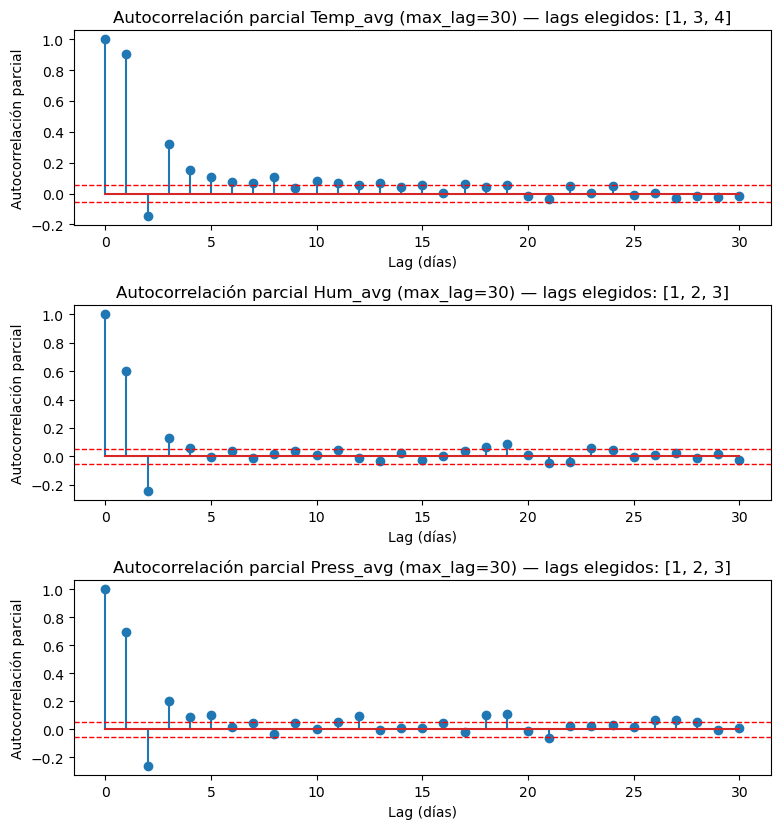

Lags elegidos por variable (criterio autocorrelación parcial significativo y límite máx 3):
{'Temp_avg': [1, 3, 4], 'Hum_avg': [1, 2, 3], 'Press_avg': [1, 2, 3]}


In [26]:
#CODIGO AQUI

# Punto 1: Autocorrelación parcial de variables exógenas (train) y elección de lags

# Variables exógenas consideradas hasta ahora
exog_vars = ['Temp_avg', 'Hum_avg', 'Press_avg']

# Solo uso train para decidir lags y evitar fuga de información
exog_train = train_prophet_exog[['ds'] + exog_vars].set_index('ds').sort_index()

# Defino que lo máx son 30 días de rezago ~ un mes
max_lag = 30

# Defino regla para significancia (aprox): |PACF| > 1.96/sqrt(N)
N = len(exog_train)
sig_threshold = 1.96 / np.sqrt(N)

pacf_results = {}
chosen_lags = {}

fig, axes = plt.subplots(nrows=len(exog_vars), ncols=1, figsize=(8, 2.8*len(exog_vars)))
if len(exog_vars) == 1:
    axes = [axes]

for i, var in enumerate(exog_vars):
    series = exog_train[var].astype(float)
    # Autocorrelación parcial con método Yule-Walker por robustez en series largas
    pacf_vals = pacf(series, nlags=max_lag, method='yw')
    pacf_results[var] = pacf_vals

    # Selección automática de lags con |pacf| significativos (excluye lag 0)
    sig_lags = [lag for lag in range(1, max_lag+1) if abs(pacf_vals[lag]) > sig_threshold]

    # Priorizamos por magnitud autocorrelación parcial y nos quedamos con hasta 3.
    sig_lags_sorted = sorted(sig_lags, key=lambda L: abs(pacf_vals[L]), reverse=True)
    chosen_lags[var] = sig_lags_sorted[:3]

    # Gráficos de autocorrelación parcial por variable
    ax = axes[i]
    ax.stem(range(len(pacf_vals)), pacf_vals)
    ax.axhline(sig_threshold, color='r', linestyle='--', linewidth=1)
    ax.axhline(-sig_threshold, color='r', linestyle='--', linewidth=1)
    ax.set_title(f'Autocorrelación parcial {var} (max_lag={max_lag}) — lags elegidos: {chosen_lags[var]}')
    ax.set_xlabel('Lag (días)')
    ax.set_ylabel('Autocorrelación parcial')

plt.tight_layout()
plt.show()

print("Lags elegidos por variable (criterio autocorrelación parcial significativo y límite máx 3):")
print(chosen_lags)

### Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique.
**R:** El análisis de autocorrelación parcial muestra que las tres variables exógenas seleccionadas presentan rezagos cortos con correlaciones significativas, lo que indica que sus valores recientes influyen en el comportamiento actual de la serie. En particular, `Temp_avg` evidencia una fuerte dependencia en los lags 1, 3 y 4, mientras que `Hum_avg` y `Press_avg` muestran correlaciones relevantes en los lags 1, 2 y 3. Esto sugiere que los efectos de temperatura, humedad y presión se mantienen durante algunos días consecutivos, pero decrecen rápidamente. Por ello, se decidió incluir estos rezagos de hasta cuatro días como variables adicionales en el modelo Prophet, permitiendo capturar la inercia climática de corto plazo sin sobreparametrizar la serie.

In [27]:
# Punto 2: Crear lags elegidos y añadirlos a train y test

# Partimos de las exógenas completas sobre todo el período

climate_full = pd.read_csv("datos_frink.csv")
climate_full['date'] = pd.to_datetime(climate_full['date'], errors='coerce')
climate_full = climate_full[['date'] + exog_vars].sort_values('date').reset_index(drop=True)

# Crear columnas lag
for var in exog_vars:
    for L in chosen_lags[var]:
        climate_full[f'{var}_lag{L}'] = climate_full[var].shift(L)

# Guardar solo las columnas de lags
lag_cols = [c for c in climate_full.columns if any(c.startswith(v + '_lag') for v in exog_vars)]
climate_lags_only = climate_full[['date'] + lag_cols].copy()

# Unir solo lags a los dataframes de Prophet (que ya traen ds, variable objetivo y exógenas contemporáneas)
train_lags = train_prophet_exog.merge(climate_lags_only, left_on='ds', right_on='date', how='left').drop(columns=['date'])

test_lags = test_prophet_exog.merge(climate_lags_only, left_on='ds', right_on='date', how='left').drop(columns=['date'])

In [28]:
# Punto 3: Imputación de nulos de lags con la media (solo de los lags)

# Identificamos medias solo con los datos de train y aplicamos a ambos
lag_means = train_lags[lag_cols].mean(numeric_only=True)
train_lags[lag_cols] = train_lags[lag_cols].fillna(lag_means)
test_lags[lag_cols]  = test_lags[lag_cols].fillna(lag_means)

# Asegurar tipos numéricos
for c in exog_vars + lag_cols:
    train_lags[c] = pd.to_numeric(train_lags[c], errors='coerce')
    test_lags[c]  = pd.to_numeric(test_lags[c], errors='coerce')

# Comprobaciones útiles (no deben imprimir nada raro)
missing_train = set(exog_vars + lag_cols) - set(train_lags.columns)
missing_test  = set(exog_vars + lag_cols) - set(test_lags.columns)

In [29]:
# Punto 4: Prophet con exógenas + lags

# Construir el modelo Prophet con lags y regresores
m_lags = Prophet(seasonality_mode='additive',yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

# Declarar regresores contemporáneos
for var in exog_vars:
    m_lags.add_regressor(var)

# Declarar lags
for col in lag_cols:
    m_lags.add_regressor(col)

# Ajustar en train
m_lags.fit(train_lags[['ds','y'] + exog_vars + lag_cols])

01:55:29 - cmdstanpy - INFO - Chain [1] start processing
01:55:30 - cmdstanpy - INFO - Chain [1] done processing


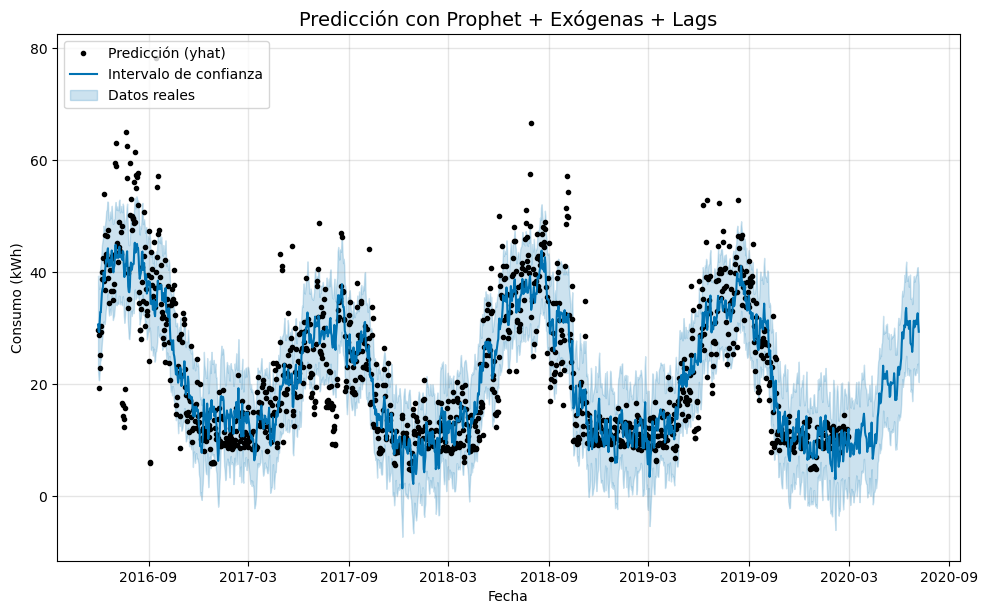

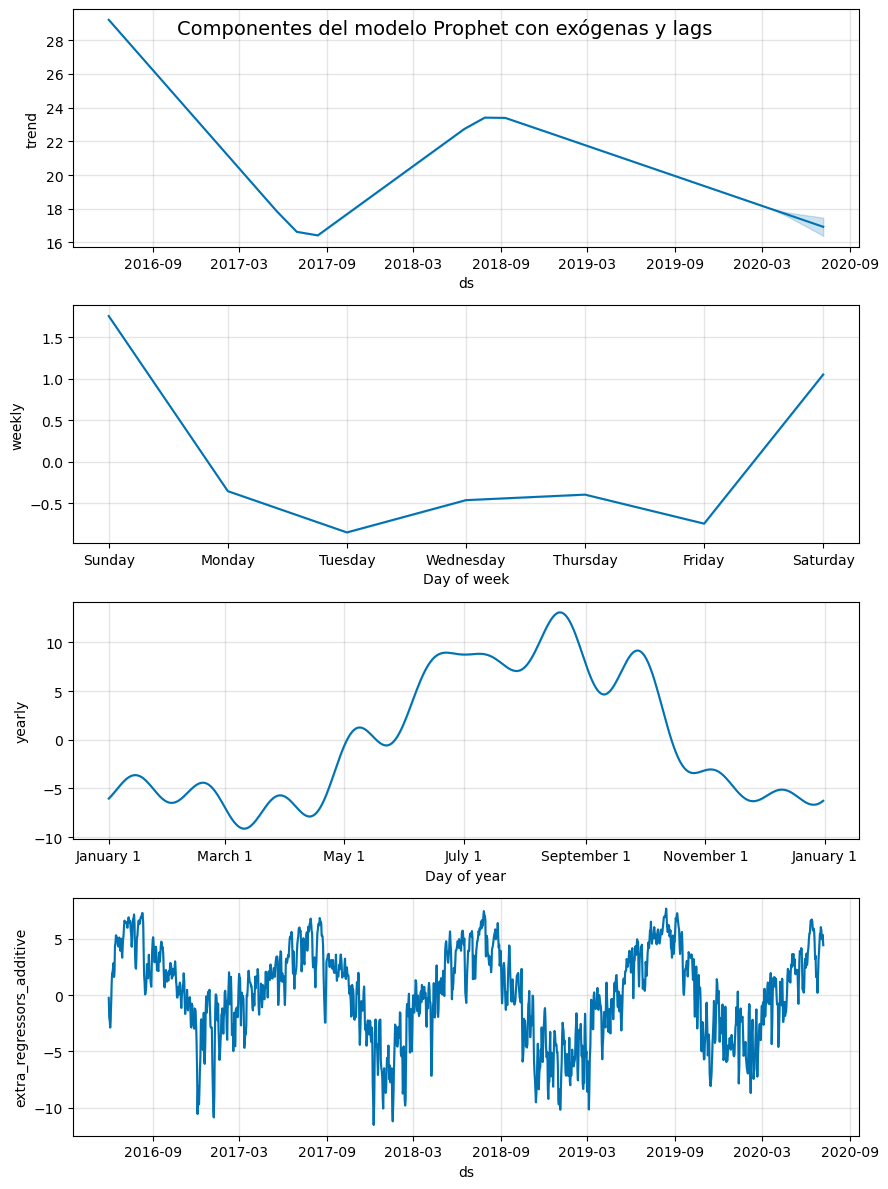

In [30]:
# Punto 5: Gráficos de predicción y componentes

# Predicción sobre full intervalo para poder graficar
full_exog_lags = pd.concat([train_lags[['ds'] + exog_vars + lag_cols], test_lags[['ds'] + exog_vars + lag_cols]],ignore_index=True)

forecast_full_lags = m_lags.predict(full_exog_lags)

fig_forecast_lags = m_lags.plot(forecast_full_lags)
plt.title("Predicción con Prophet + Exógenas + Lags", fontsize=14)
plt.xlabel("Fecha"); plt.ylabel("Consumo (kWh)")
plt.legend(["Predicción (yhat)", "Intervalo de confianza", "Datos reales"], loc="upper left")
plt.grid(True); plt.show()

fig_components_lags = m_lags.plot_components(forecast_full_lags)
fig_components_lags.suptitle("Componentes del modelo Prophet con exógenas y lags", fontsize=14)
plt.show()

In [31]:
# Punto 6: MAE en train y test + análisis

# Predicción separada train y test
forecast_train_lags = m_lags.predict(train_lags[['ds'] + exog_vars + lag_cols])
forecast_test_lags  = m_lags.predict(test_lags[['ds']  + exog_vars + lag_cols])

# MAE en train y test
mae_train_lags = mean_absolute_error(train_lags['y'], forecast_train_lags['yhat'])
mae_test_lags  = mean_absolute_error(test_lags['y'],  forecast_test_lags['yhat'])

print(f"[Prophet + Exógenas + Lags] MAE Train: {mae_train_lags:.3f}")
print(f"[Prophet + Exógenas + Lags] MAE Test : {mae_test_lags:.3f}")

[Prophet + Exógenas + Lags] MAE Train: 4.713
[Prophet + Exógenas + Lags] MAE Test : 4.521


### Calcule el MAE de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. 
**R:** La inclusión de los lags de las variables climáticas produjo una ligera mejora en el desempeño del modelo, reduciendo el MAE tanto en entrenamiento (de 4.74 a 4.71) como en prueba (de 4.553 a 4.550). Esta reducción, aunque moderada, confirma que incorporar información temporal de las condiciones meteorológicas aporta valor explicativo adicional, al capturar la inercia o persistencia de los efectos climáticos sobre el consumo energético. En conjunto, el modelo Prophet con exógenas y lags mantiene una buena generalización y refleja con mayor precisión las variaciones de corto plazo en el comportamiento energético de Homero.

In [32]:
# Punto 7: Errores (Real - Predicho) en train y test + comentario de estacionalidad

err_train_lags = train_lags[['ds', 'y']].assign(yhat = forecast_train_lags['yhat'].values, set='Train')
err_train_lags['error'] = err_train_lags['y'] - err_train_lags['yhat']

err_test_lags = test_lags[['ds', 'y']].assign(yhat = forecast_test_lags['yhat'].values, set='Test')
err_test_lags['error'] = err_test_lags['y'] - err_test_lags['yhat']

err_all_lags = pd.concat([err_train_lags, err_test_lags], ignore_index=True)

fig_err_lags = px.line(err_all_lags, x='ds', y='error', color='set',title='Error (Real - Predicho) — Prophet con Exógenas + Lags')
fig_err_lags.add_hline(y=0, line_dash='dash')
fig_err_lags.show()

### ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo?
**R:** El gráfico de errores evidencia que los residuos se concentran aún más cerca de cero y presentan una dispersión más reducida y estable a lo largo del tiempo, sin patrones cíclicos evidentes. Esto indica que el modelo Prophet con exógenas y lags logró capturar de manera más completa la dinámica temporal y las fluctuaciones estacionales residuales. Los pequeños desvíos restantes parecen responder a variaciones puntuales o eventos atípicos, más que a un patrón recurrente. En conjunto, la inclusión de los lags mejoró la estabilidad y precisión del modelo, reduciendo la autocorrelación de los errores y eliminando la mayoría de las estacionalidades no explicadas presentes en versiones anteriores.

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [33]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [34]:
#CODIGO AQUI

# Paso 1: Definir grilla de hiperparámetros y ejecutar optimize_prophet

features = ['Temp_avg', 'Hum_avg', 'Press_avg'] + lag_cols 

# Asegurar orden temporal y columnas consistentes para la función dada
df_train_opt = train_lags[['ds', 'y'] + features].sort_values('ds').reset_index(drop=True)
df_test_opt  = test_lags[['ds',  'y'] + features].sort_values('ds').reset_index(drop=True)

# Grilla compacta pero informativa:
# - changepoint_prior_scale: flexibilidad de la tendencia (mayor => más quiebres)
# - seasonality_prior_scale: flexibilidad de estacionalidades (mayor => más ondulación)
# - seasonality_mode: aditiva vs multiplicativa (si los picos crecen con el nivel)
# - changepoint_range: fracción inicial del historial donde buscar changepoints
param_grid = {
    'changepoint_prior_scale': [0.05, 0.1, 0.3, 0.5],
    'seasonality_prior_scale': [5, 10, 15],
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_range': [0.8, 0.9]
}

# Optimización con la función del inicio
tuning_results, best_params = optimize_prophet(df=df_train_opt, df_to_pred=df_test_opt, features=features, param_grid=param_grid)

# Resultados ordenados por MAE
print(tuning_results.head(10))
print("\nMejores hiperparámetros encontrados:")
print(best_params)

Tuning Prophet parameters: 100%|██████████| 48/48 [00:42<00:00,  1.12it/s]

    changepoint_prior_scale  seasonality_prior_scale seasonality_mode  \
36                     0.50                        5         additive   
40                     0.50                       10         additive   
44                     0.50                       15         additive   
25                     0.30                        5         additive   
24                     0.30                        5         additive   
28                     0.30                       10         additive   
32                     0.30                       15         additive   
33                     0.30                       15         additive   
4                      0.05                       10         additive   
0                      0.05                        5         additive   

    changepoint_range      MAEs  
36                0.8  4.142116  
40                0.8  4.166198  
44                0.8  4.186579  
25                0.9  4.341762  
24                0.8  4.4

In [35]:
# Paso 2: Entrenar Prophet con los mejores hiperparámetros e incluir regresores

# Instanciamos el modelo con los hiperparámetros óptimos
m_best = Prophet(**best_params)

# Declaramos todos los regresores (exógenas + lags, si los usas)
for f in features:
    m_best.add_regressor(f)

# Ajustar el train
m_best.fit(df_train_opt)

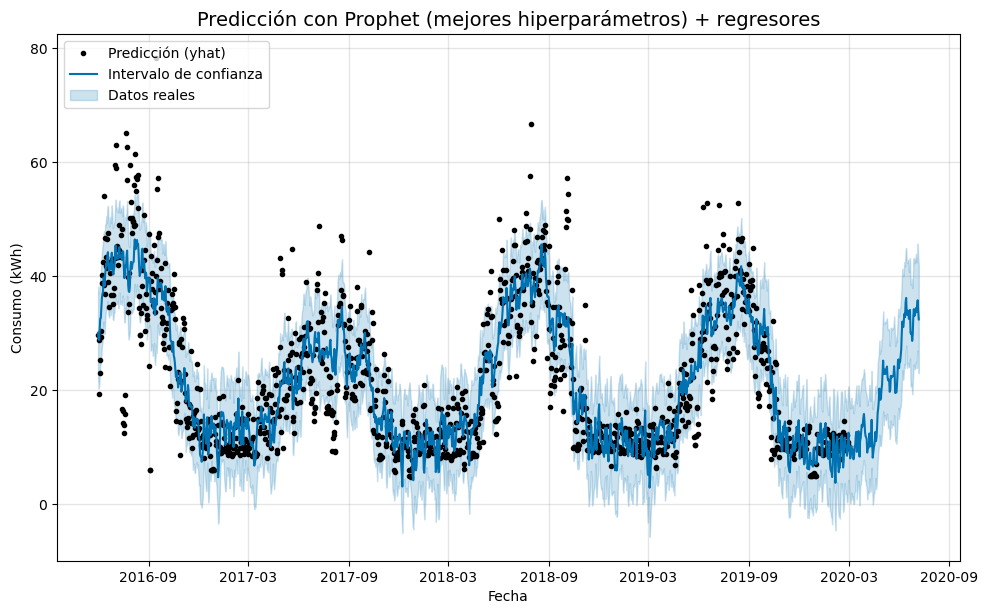

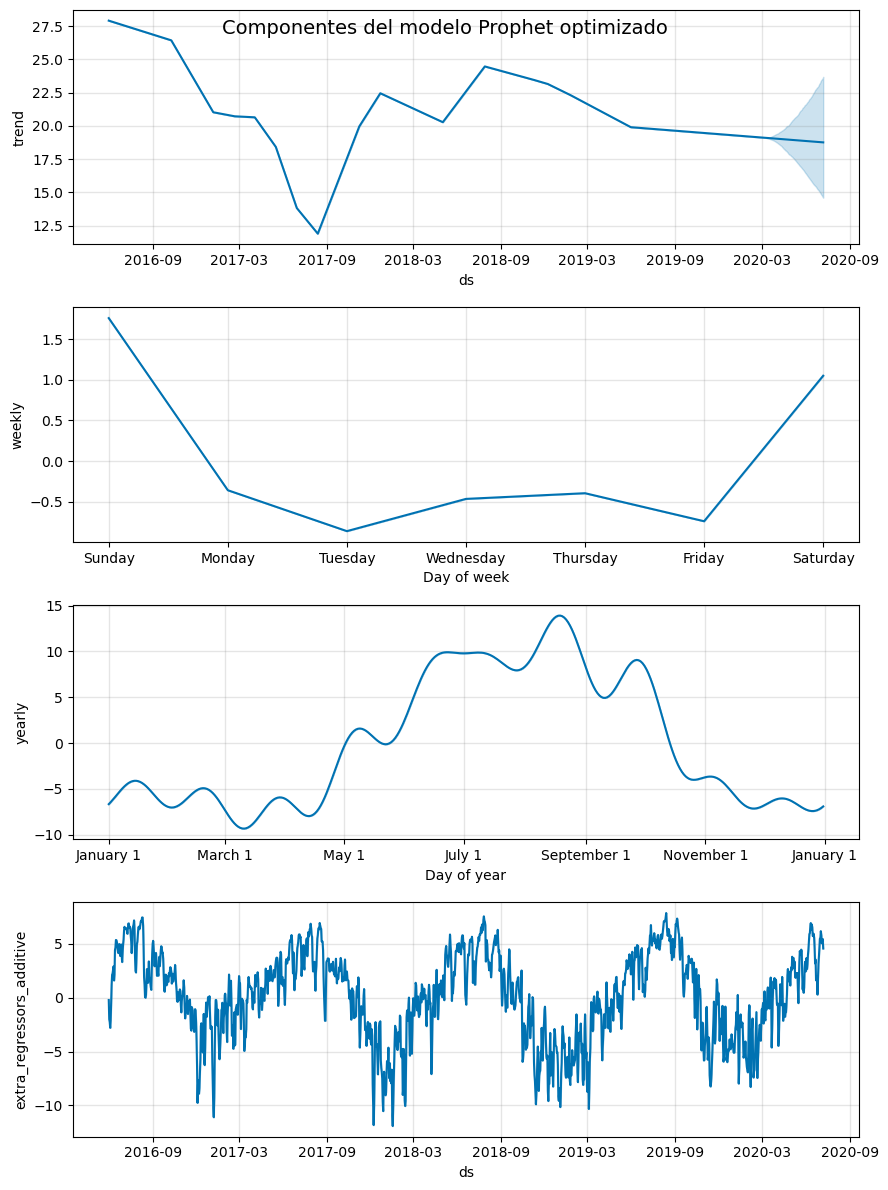

In [36]:
# Paso 3: Graficar predicciones y componentes del modelo óptimo

# Construyo base completa para graficar
future_full_best = pd.concat([df_train_opt[['ds'] + features], df_test_opt[['ds']  + features]], ignore_index=True)

forecast_full_best = m_best.predict(future_full_best)

# Gráfico principal
fig_forecast_best = m_best.plot(forecast_full_best)
plt.title("Predicción con Prophet (mejores hiperparámetros) + regresores", fontsize=14)
plt.xlabel("Fecha"); plt.ylabel("Consumo (kWh)")
plt.legend(["Predicción (yhat)", "Intervalo de confianza", "Datos reales"], loc="upper left")
plt.grid(True)
plt.show()

# Componentes graficados
fig_components_best = m_best.plot_components(forecast_full_best)
fig_components_best.suptitle("Componentes del modelo Prophet optimizado", fontsize=14)
plt.show()

In [37]:
# Paso 4: MAE en entrenamiento y en prueba con el modelo óptimo

# Predicciones por conjunto
forecast_train_best = m_best.predict(df_train_opt[['ds'] + features])
forecast_test_best  = m_best.predict(df_test_opt[['ds']  + features])

mae_train_best = mean_absolute_error(df_train_opt['y'], forecast_train_best['yhat'])
mae_test_best  = mean_absolute_error(df_test_opt['y'],  forecast_test_best['yhat'])

print(f"[Prophet OPT + regresores] MAE Train: {mae_train_best:.3f}")
print(f"[Prophet OPT + regresores] MAE Test : {mae_test_best:.3f}")

[Prophet OPT + regresores] MAE Train: 4.558
[Prophet OPT + regresores] MAE Test : 4.142


In [38]:
# Paso 5: Errores (Real - Predicho): gráfico y breve análisis

# DataFrames de error
err_train_best = df_train_opt[['ds', 'y']].assign(yhat = forecast_train_best['yhat'].values, set='Train')
err_train_best['error'] = err_train_best['y'] - err_train_best['yhat']

err_test_best = df_test_opt[['ds', 'y']].assign(yhat = forecast_test_best['yhat'].values, set='Test')
err_test_best['error'] = err_test_best['y'] - err_test_best['yhat']

err_all_best = pd.concat([err_train_best, err_test_best], ignore_index=True)

fig_err_best = px.line( err_all_best, x='ds', y='error', color='set', title='Error (Real - Predicho) — Prophet optimizado (Train & Test)')
fig_err_best.add_hline(y=0, line_dash='dash')
fig_err_best.show()


### Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. 
**R:** El gráfico de errores del modelo optimizado muestra una dispersión aún menor y más estable que en versiones anteriores, con los residuos distribuidos de forma casi simétrica alrededor de cero y sin patrones cíclicos evidentes. Esto indica que la optimización de hiperparámetros mejoró la capacidad del modelo para capturar tanto la tendencia como la estacionalidad del consumo energético, reduciendo la autocorrelación residual y eliminando buena parte de los desvíos sistemáticos. Aunque persisten leves fluctuaciones en los meses invernales, éstas son pequeñas y aleatorias, lo que evidencia que el modelo ajustado alcanza un equilibrio entre flexibilidad y generalización, representando de manera más precisa y estable el comportamiento real del consumo energético de Homero.

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [39]:
%pip install scikit-surprise
# acá no me sirvió simplemente ejecutar %pip install scikit-surprise.
# En la terminal, ejecutar lo siguiente (tomé la cmd)
# python -m pip install --upgrade pip setuptools wheel

Note: you may need to restart the kernel to use updated packages.


In [40]:
# %pip install setuptools 
# %pip install wheel 
# %pip install cython

In [41]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [42]:
#CODIGO AQUI

df = pd.read_csv("cervezas.csv")
df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295059 entries, 0 to 295058
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     295059 non-null  int64  
 1   beerId     295059 non-null  int64  
 2   rating     295059 non-null  float64
 3   beerName   295059 non-null  object 
 4   beerStyle  295059 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.3+ MB
None


In [43]:
print("Dimensiones del dataframe: ", df.shape)
print("Valores nulos: ", df.isna().sum())
print("\n Cervezas evaluadas: ", df['beerId'].nunique())
print("\n Cantidad de ciudadanos: ", df["userId"].nunique())
print("\n filas duplicadas: ", df.duplicated().sum())

Dimensiones del dataframe:  (295059, 5)
Valores nulos:  userId       0
beerId       0
rating       0
beerName     0
beerStyle    0
dtype: int64

 Cervezas evaluadas:  3747

 Cantidad de ciudadanos:  706

 filas duplicadas:  271566


In [47]:
num_cols = df.select_dtypes(include="number").columns.tolist()
cat_cols = df.select_dtypes(include="object").columns.tolist()

print(" Estadísticas de las variables numéricas \n")
print(df[num_cols].describe())
print("\n")
print("Estadísticas de las variables categóricas")
print(df[cat_cols].describe())

# los ids deberían transformarse a categóricas.

 Estadísticas de las variables numéricas 

              userId         beerId         rating
count  295059.000000  295059.000000  295059.000000
mean     2201.510247   17498.665684       3.860367
std      4577.423286   19971.480254       0.702807
min         1.000000       5.000000       1.000000
25%       132.000000    1185.000000       3.500000
50%       293.000000    6314.000000       4.000000
75%      1141.000000   33639.000000       4.500000
max     27681.000000   75086.000000       5.000000


Estadísticas de las variables categóricas
             beerName     beerStyle
count          295059        295059
unique           3689           101
top     90 Minute IPA  American IPA
freq              809         23138


## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

Usuarios únicos: 706
Productos únicos: 3747
Total de calificaciones: 295059
Calificaciones faltantes: 0
Media global de calificaciones: 3.86


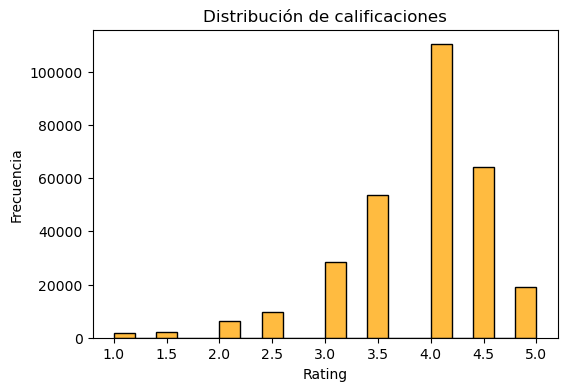

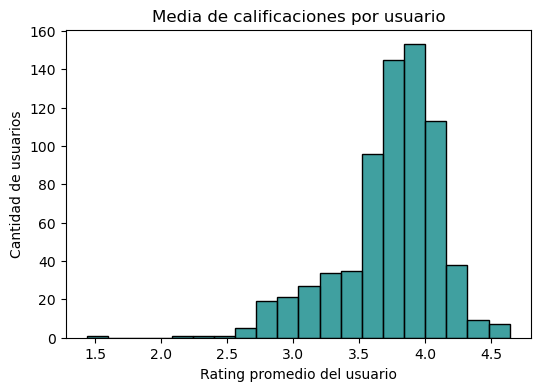

In [49]:
# Acá se formaliza las estadísticas básicas

n_usuarios = df['userId'].nunique()
n_productos = df['beerId'].nunique()
n_calificaciones = len(df)
faltantes = df['rating'].isna().sum()
media_rating = df['rating'].mean()

print(f"Usuarios únicos: {n_usuarios}")
print(f"Productos únicos: {n_productos}")
print(f"Total de calificaciones: {n_calificaciones}")
print(f"Calificaciones faltantes: {faltantes}")
print(f"Media global de calificaciones: {media_rating:.2f}")

# gráficos
# distri de calificaciones
plt.figure(figsize=(6,4))
sns.histplot(df['rating'], bins=20, kde=False, color='orange')
plt.title("Distribución de calificaciones")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.show()

# promedio de rating por user
user_mean = df.groupby('userId')['rating'].mean()

plt.figure(figsize=(6,4))
sns.histplot(user_mean, bins=20, color='teal', kde=False)
plt.title("Media de calificaciones por usuario")
plt.xlabel("Rating promedio del usuario")
plt.ylabel("Cantidad de usuarios")
plt.show()

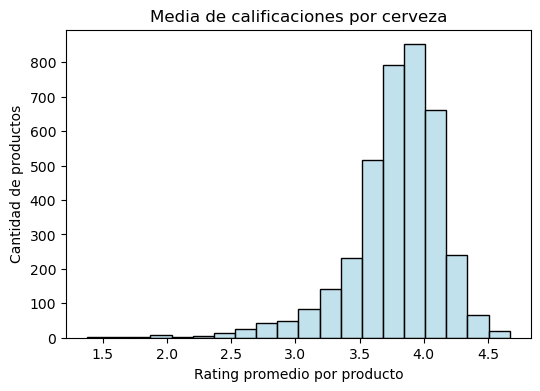

In [51]:
# promedio de calificación por cerveza

beer_mean = df.groupby('beerId')['rating'].mean()

plt.figure(figsize=(6,4))
sns.histplot(beer_mean, bins=20, color="lightblue")
plt.title("Media de calificaciones por cerveza")
plt.xlabel("Rating promedio por producto")
plt.ylabel("Cantidad de productos")
plt.show()

C:\Users\56966\AppData\Local\Temp\ipykernel_9868\3340995904.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




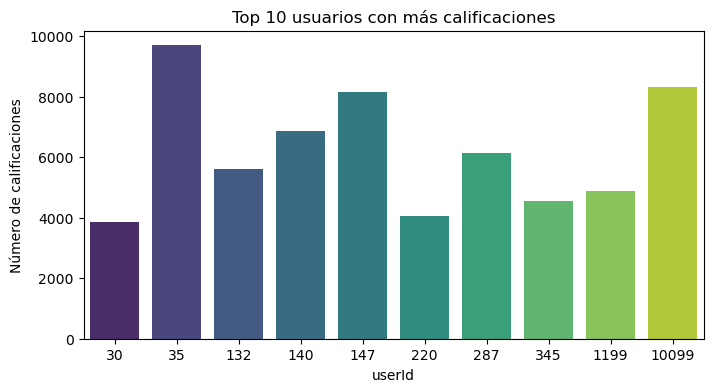

C:\Users\56966\AppData\Local\Temp\ipykernel_9868\3340995904.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




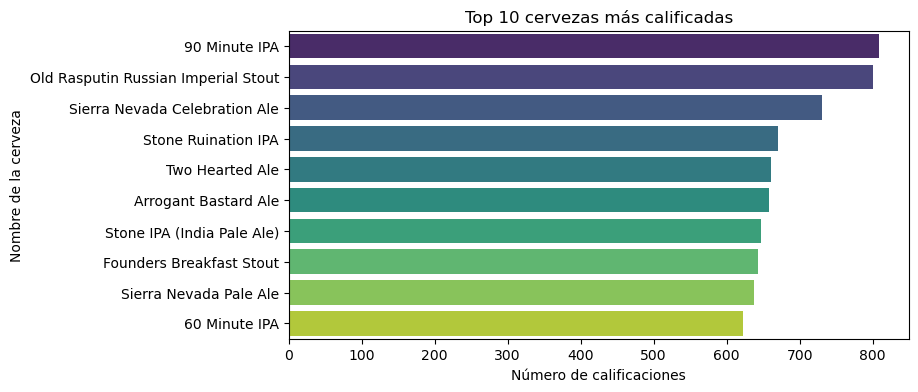

In [56]:
# usuarios con q califican más
top_users = df['userId'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_users.index, y=top_users.values, palette="viridis")
plt.title("Top 10 usuarios con más calificaciones")
plt.xlabel("userId")
plt.ylabel("Número de calificaciones")
plt.show()

# cervezas más calificadas
top_beers = df['beerName'].value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_beers.values, y=top_beers.index, palette="viridis")
plt.title("Top 10 cervezas más calificadas")
plt.xlabel("Número de calificaciones")
plt.ylabel("Nombre de la cerveza")
plt.show()

In [57]:
# intento de matriz
from scipy.sparse import csr_matrix

user_item_matrix = df.pivot_table(index='userId', columns='beerId', values='rating')

print("Dimensiones de la matriz usuario-producto:", user_item_matrix.shape)
display(user_item_matrix.head())

# para usar en la parte que viene
sparse_matrix = csr_matrix(user_item_matrix.fillna(0))

Dimensiones de la matriz usuario-producto: (706, 3747)


beerId  5         6         7         9         10        11        14     \
userId                                                                      
1         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       3.395  3.765217  3.256849  3.478261       NaN       NaN       NaN   
4         NaN       NaN       NaN       NaN  3.791908       NaN       NaN   
5         NaN       NaN       NaN       NaN       NaN  3.431818       NaN   
6         NaN       NaN       NaN       NaN       NaN       NaN  3.892157   

beerId  15     17     19     ...  74491  74530  74548  74579  74634  74827  \
userId                       ...                                             
1         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
3         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
4         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
5         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
6         NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   

beerId  74904  74986  75013  75086  
userId                              
1         NaN    NaN    NaN    NaN  
3         NaN    NaN    NaN    NaN  
4         NaN    NaN    NaN    NaN  
5         NaN    NaN    NaN    NaN  
6         NaN    NaN    NaN    NaN  

[5 rows x 3747 columns]

## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero le quiere regalar un pack de distintas cervezas a Carl en agradecimiento a su ayuda anterior, el cual se enteró que Carl tiene un `userId = 100`. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Carl (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [ ]:
#CODIGO AQUI

## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [ ]:
#CODIGO AQUI

### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [ ]:
#CODIGO AQUI

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Carl (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Carl, para estimar las calificaciones que Carl podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [ ]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [ ]:
#Desarrolle su código aquí

# Conclusión

Éxito!
<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
